### Business Objectives
1. Find the best combustible & potentially try a more sustainable alternative
2. Learn the optimal conditions for using the least combustible possible

To fulfill the business objectives, we will:
1. Analyze the consumption using different combustibles
2. Analyze the factors that influence combustible consumption 
3. Analyze the cost advantages & disadvantages of various combustibles & conditions

**Limitations** 
For this dataset, we are not controlling for the amount of fuel in the tank, which might have an impact on fuel consumption. If we were to use different datasets, we'd also have to control for car make & roads used.

### Data Exploration & Cleaning

Some information about our dataset from the data owner on [Kaggle](https://www.kaggle.com/datasets/anderas/car-consume):

>In the file, you will find the:
> * displayed distance (km); 
> * the consume (L/100km); 
> * the average speed (km/h), 
> * the temperature i had inside (°C), 
> * the temperature outside (°C), 
> * anything special that happened, 
> * if it was raining, 
> * if the air condition was on, 
> * if it was sunny enough that the car felt warm when i started it… and yes - 
> * the gas type i was using. 

>I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

>I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as i was doing my own project on it already.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Chose the Excel dataset as it already had the numbers correctly formatted as
# floats instead of objects
data = pd.read_excel("/home/sabina/Documents/2022_job_hunt/technical_tests/careerhack_challenge/technical_challenge_DA/data/measurements2.xlsx")

In [24]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [26]:
# Remove refill liters & gas as it's mostly null values
data.drop(["refill liters", "refill gas"], axis=1, inplace=True)

In [27]:
round(data.describe(), 2)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.00,388.00,388.00,376.00,388.00,388.00,388.00,388.00
mean,19.65,4.91,41.93,21.93,11.36,0.08,0.12,0.08
std,22.67,1.03,13.60,1.01,6.99,0.27,0.33,0.28
min,1.30,3.30,14.00,19.00,-5.00,0.00,0.00,0.00
25%,11.80,4.30,32.75,21.50,7.00,0.00,0.00,0.00
50%,14.60,4.70,40.50,22.00,10.00,0.00,0.00,0.00
75%,19.00,5.30,50.00,22.50,16.00,0.00,0.00,0.00
max,216.10,12.20,90.00,25.50,31.00,1.00,1.00,1.00


In [28]:
data.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [29]:
data["specials"].loc[0]

nan

In [30]:
# Change the specials column to a snow column
data["specials"].fillna("0", inplace=True)
data["specials"] = data["specials"].apply(lambda x: 1 if "snow" in x.lower() else 0)

In [31]:
data.rename({"specials": "snow"}, axis=1, inplace=True)
data.head()

,distance,consume,speed,temp_inside,temp_outside,snow,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,E10,0,0,0
1,12.0,4.2,30,21.5,13,0,E10,0,0,0
2,11.2,5.5,38,21.5,15,0,E10,0,0,0
3,12.9,3.9,36,21.5,14,0,E10,0,0,0
4,18.5,4.5,46,21.5,15,0,E10,0,0,0


In [32]:
# Given we can't control the weather outside, we'll instead look at the 
# temperature difference between the car & the environment instead:
data["temp_diff"] = data["temp_inside"] - data["temp_outside"]
data.drop(["temp_inside", "temp_outside"], axis=1, inplace=True) 

In [33]:
data.rain.unique()

array([0, 1])

In [34]:
data.sun.unique()

array([0, 1])

In [35]:
data.AC.unique()

array([0, 1])

In [36]:
data.temp_diff.isna().value_counts()

False    376
True      12
Name: temp_diff, dtype: int64

In [37]:
# We can also drop the rows with null values, as they represent little of the 
# whole dataset
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   distance   376 non-null    float64
 1   consume    376 non-null    float64
 2   speed      376 non-null    int64  
 3   snow       376 non-null    int64  
 4   gas_type   376 non-null    object 
 5   AC         376 non-null    int64  
 6   rain       376 non-null    int64  
 7   sun        376 non-null    int64  
 8   temp_diff  376 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 29.4+ KB


From the information in the dataset, we would like to infer:

* Which factors influence fuel consumption?
* Which factors are dependent on each other?
* Does the type of gas used matter in terms of fuel consumption?
* Which fuel is the most cost effective?
* What can we improve upon to ensure we're optimizing fuel consumption?

### Data Visualization

In [38]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import Spectral4
from bokeh.layouts import row, column
output_notebook()

Loading BokehJS ...

In [44]:
MARKERS = ['hex', 'circle_x', 'triangle']
GAS_TYPES = list(data.gas_type.unique())

E10_data = data[data["gas_type"] == "E10"]
SP98_data = data[data["gas_type"] == "SP98"]

p = figure(width=700, height=250)
p.title.text = """Fuel consumption dependence on temperature difference 
(Click on legend entries to mute the corresponding lines)"""

for df, name, color in zip([E10_data, SP98_data], ["E10", "SP98"], Spectral4):
    p.scatter("temp_diff", "consume", source=df, fill_alpha=0.4, size=12,
          marker=factor_mark('gas_type', MARKERS, GAS_TYPES), 
          color=color, alpha=0.8, 
          muted_color=color, muted_alpha=0.2, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

show(p)

In [45]:
p = figure(width=700, height=250)
p.title.text = """Fuel consumption dependence on speed 
(Click on legend entries to mute the corresponding lines)"""

for df, name, color in zip([E10_data, SP98_data], ["E10", "SP98"], Spectral4):
    p.scatter("speed", "consume", source=df, fill_alpha=0.4, size=12,
          marker=factor_mark('gas_type', MARKERS, GAS_TYPES), 
          color=color, alpha=0.8, 
          muted_color=color, muted_alpha=0.2, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

show(p)

In [46]:
p = figure(width=700, height=250)
p.title.text = """Fuel consumption dependence on distance 
(Click on legend entries to mute the corresponding lines)"""

for df, name, color in zip([E10_data, SP98_data], ["E10", "SP98"], Spectral4):
    p.scatter("distance", "consume", source=df, fill_alpha=0.4, size=12,
          marker=factor_mark('gas_type', MARKERS, GAS_TYPES), 
          color=color, alpha=0.8, 
          muted_color=color, muted_alpha=0.2, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

show(p)

We can notice a somewhat linear dependence of fuel consumption and speed / temperature difference, but not with the distance.

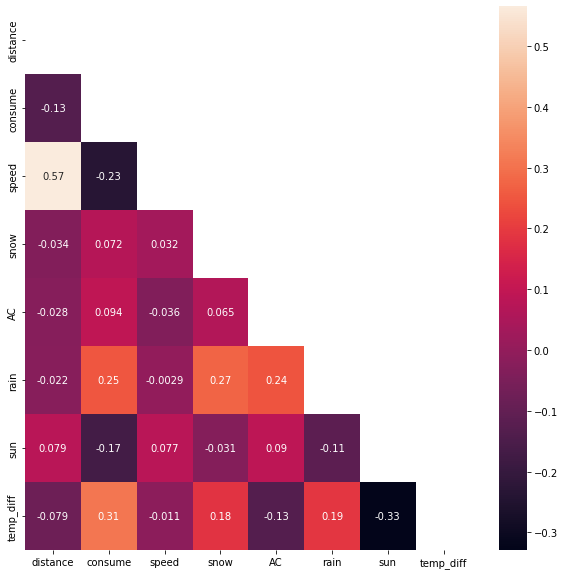

In [41]:
# Calculate correlation matrix
data.corr()

# Create heatmap
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

There is little colinearity amongst our variables, so we can use them to predict fuel consumption based on weather conditions and speed used. We also notice that there is very little variation among the type of fuel used, suggesting that Cobify should look into different alternatives.

### Conclusions

From visualizing the data we can notice that consumption is lower at higher speeds and lower temperature differences, suggesting that:
* during winter season, Cobify should increase its prices in order to maintain its margins
* drivers should use the highest speed they can as long as it is safe to do so

### Next steps

Cobify should try out more fuel types and record data for car, engine types, and types of road taken to see which type of ride would be better for its margins.